# Sales Analysis

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read all the data

df_jan = pd.read_csv('Sales_January_2019.csv')
df_feb = pd.read_csv('Sales_February_2019.csv')
df_mar = pd.read_csv('Sales_March_2019.csv')
df_apr = pd.read_csv('Sales_April_2019.csv')
df_may = pd.read_csv('Sales_May_2019.csv')
df_jun = pd.read_csv('Sales_June_2019.csv')
df_jul = pd.read_csv('Sales_July_2019.csv')
df_aug = pd.read_csv('Sales_August_2019.csv')
df_sep = pd.read_csv('Sales_September_2019.csv')
df_oct = pd.read_csv('Sales_October_2019.csv')
df_nov = pd.read_csv('Sales_November_2019.csv')
df_dec = pd.read_csv('Sales_December_2019.csv')

In [3]:
# Concatenate all the data

df = pd.concat([df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul,
                df_aug, df_sep, df_oct, df_nov, df_dec])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
# Columns on the data

df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [5]:
# How many null in the data?

df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
# Drop all the null data

df.dropna(inplace = True)

In [7]:
# All null is dropped

df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

###### Add 'month' column

In [8]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

##### Look at the Month's column that contains 'Or'

In [9]:
df[df['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


##### Drop all month's column that contain 'Or'

In [10]:
df = df[df['Month'] != 'Or']

##### It proves that all Month's column that contain 'Or' is dropped

In [11]:
df[df['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [12]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

In [13]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


#### Question 1: What was the best month for sales? How much was earned that month?

In [14]:
df['Sales'] = df['Quantity Ordered'].astype(int) * df['Price Each'].astype(float)

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


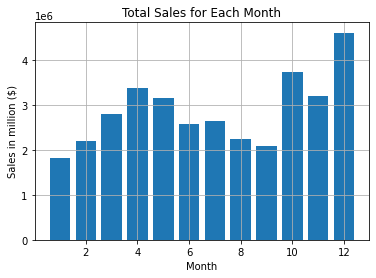

In [17]:
# Plot total sales for each month

months = range(1, 13)
plt.figure(figsize = (12, 6))
plt.bar(months, df.groupby('Month')['Sales'].sum())
plt.title('Total Sales for Each Month')
plt.xlabel('Month')
plt.ylabel('Sales in million ($)')
plt.grid()
plt.show()

#### Question 2: What city sold the most product?

In [18]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [19]:
df['City'].unique()

array([' Boston', ' Portland', ' San Francisco', ' Los Angeles',
       ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas'],
      dtype=object)

In [20]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=True).to_frame()
city_sales

,Sales
City,
Austin,1.819582e+06
Portland,2.320491e+06
Seattle,2.747755e+06
Dallas,2.767975e+06
Atlanta,2.795499e+06
Boston,3.661642e+06
New York City,4.664317e+06
Los Angeles,5.452571e+06
San Francisco,8.262204e+06


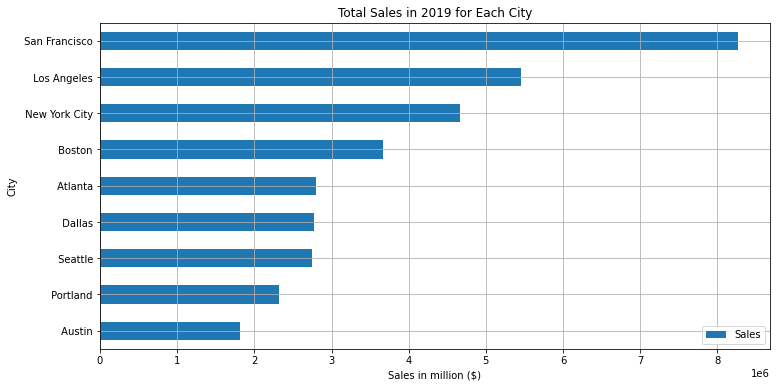

In [75]:
city_sales.plot(kind='barh',
                figsize = (12, 6))
plt.title('Total Sales in 2019 for Each City')
plt.xlabel('Sales in million ($)')
plt.ylabel('City')
plt.grid()
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [21]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,11


In [23]:
hour_sales = df.groupby('Hour')['Sales'].sum()
hour_sales.sort_values(ascending=False)

Hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Sales, dtype: float64

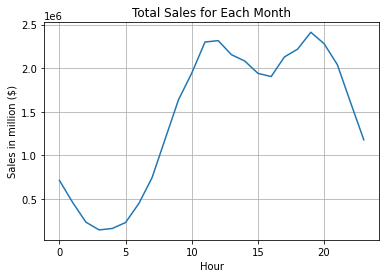

In [24]:
hour = range(0, 24)
plt.plot(hour, hour_sales)
plt.title('Total Sales for Each Month')
plt.xlabel('Hour')
plt.ylabel('Sales in million ($)')
plt.grid()
plt.show()

From the graph above, we know that we can maximize our advertisement from 10 AM until 2 PM and 6 PM until 9 PM.

#### Question 4: What product sold the most? Why do you think it sold the most?

In [46]:
product = df['Product'].value_counts()
product

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

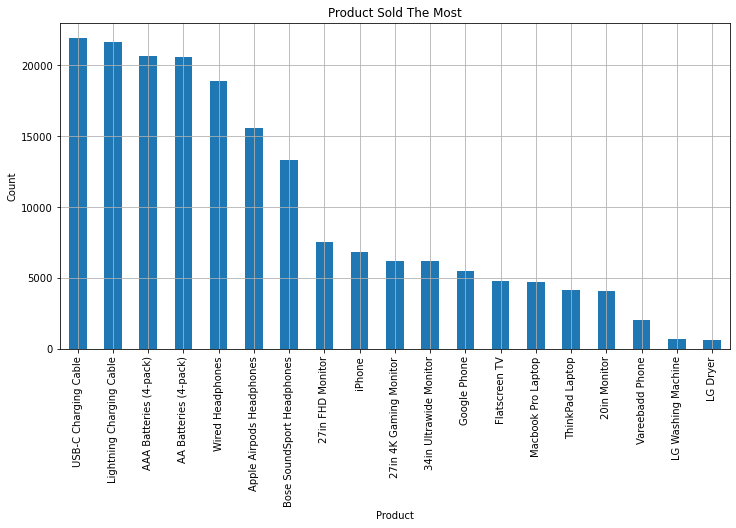

In [26]:
product.plot(kind = 'bar',
             figsize = (12, 6))
plt.title('Product Sold The Most')
plt.xlabel('Product')
plt.ylabel('Count')
plt.grid()
plt.show()